## Data Description

There are 14 columns:

##### age. The age of the patient.
##### sex. The gender of the patient. (1 = male, 0 = female).
##### cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
##### trestbps. Resting blood pressure in mmHg.
##### chol. Serum Cholestero in mg/dl.
##### fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
##### restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
##### thalach. Max heart rate achieved.
##### exang. Exercise induced angina (1 = yes, 0 = no).
##### oldpeak. ST depression induced by exercise relative to rest.
##### slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
###### ca. Number of major vessels (0–3) colored by flourosopy.
###### thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
###### num. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score



In [5]:
## loading the data
df = pd.read_csv('heart_disease.csv')

In [3]:
## inspecting the data for characteristics 
df.head()
df.shape ## rows, columns

(303, 14)

In [ ]:
## Data exploration
# 1. What questions are you trying to solve
# 2. what data have you
# 3. whats is missing and how will u deal with that
# 4. what are the outliers and why should u care about them
# 5. how can you add, change or remove features to get more out of your data

In [4]:
## finding out how your target variable is distributed
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

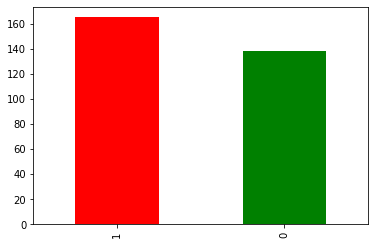

In [5]:
## visualising the target variable
df['target'].value_counts().plot(kind='bar',
                                color= ['red', 'green'])

In [6]:
## checking the attributes of these columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [37]:
## checking if there is any missing
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [38]:
## have a numerical description of ur data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [45]:
## see the distribution between the sexes 
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [47]:
## How does sex influence heart disease
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

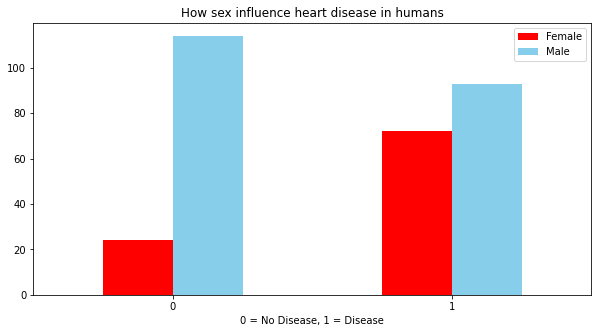

In [67]:
## make a plot of this influence

pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   color=['red', 'skyblue'],
                                   title='How sex influence heart disease in humans',
                                   figsize=(10, 5))


plt.xlabel('0 = No Disease, 1 = Disease')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0) ## rotates the x-value

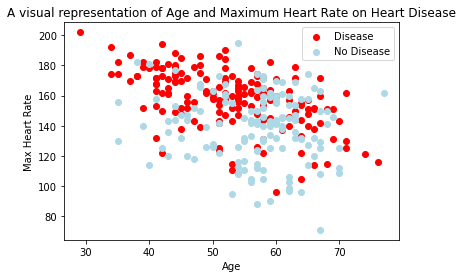

In [102]:
## see how thalach and age affect heart disease i.e target column

plt.plot(figsize=(10, 6))


plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='red')

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue')

plt.title('A visual representation of Age and Maximum Heart Rate on Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

<AxesSubplot:ylabel='Frequency'>

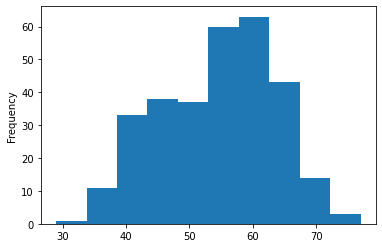

In [77]:
## check the distribution of the age column
## checking distributions in a way like this helps you detect outliers

df.age.plot.hist()


In [99]:
pd.crosstab(df.target, df.fbs)

fbs,0,1
target,,
0,116,22
1,142,23


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

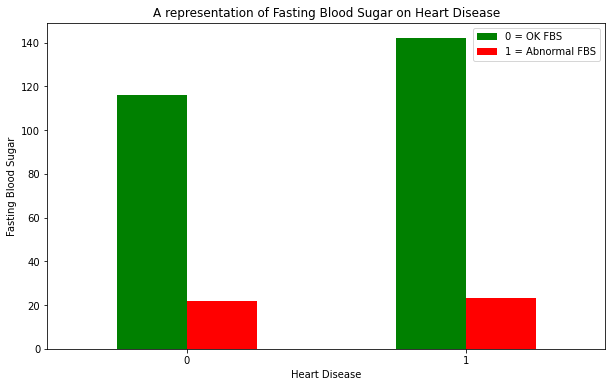

In [98]:
## testing fasting blood sugar on heart disease

pd.crosstab(df.target, df.fbs).plot(kind='bar',
                                   color=['green', 'red'],
                                   figsize=(10, 6))

plt.title('A representation of Fasting Blood Sugar on Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Fasting Blood Sugar')
plt.legend(['0 = OK FBS', '1 = Abnormal FBS'])
plt.xticks(rotation=0)

In [ ]:
# From the diagram above, we can deduce that having a normal fbs 
# is not a prerequisite to staying heart disease free. 
# Findings that inspires this project to look at other influencing factors.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

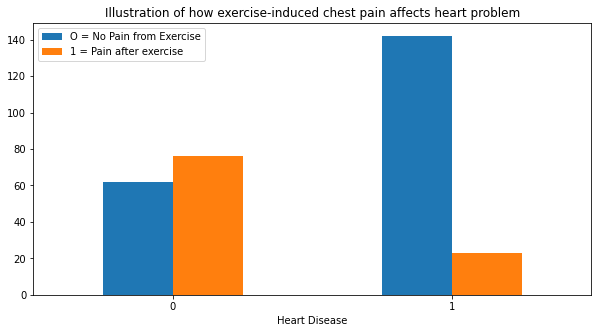

In [126]:
## seeing how exercise induced chest pain affect heart disease

pd.crosstab(df.target, df.exang).plot(kind='bar',
                                     figsize=(10, 5))

plt.title('Illustration of how exercise-induced chest pain affects heart problem')
plt.xlabel('Heart Disease')
plt.legend(['O = No Pain from Exercise', '1 = Pain after exercise'])
plt.xticks(rotation=0)

In [127]:
## The above is an interesting result that needs to be researched further, 
## this is telling that people with no pain from exercise are more likely to have heart disease than those that feel
## pain. That is a pure example of negative correlation betweeen those two.

In [128]:
## see a corraltion of how all variables affect heart disease
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


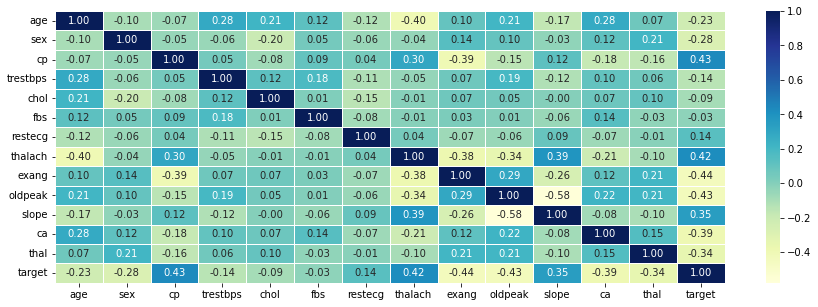

In [139]:
## making this a lot 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 5))

ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')

#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5) ## this is to fix the bottom or top of your corr matrix if not fitting

In [146]:
plt.savefig('cor-matrix.jpeg')

<Figure size 432x288 with 0 Axes>

In [6]:
## Split our data
X = df.drop('target', axis=1)
y = df['target']

In [7]:
## Set into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
np.random.seed(0)
models = {'LogisticRegression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'RandomForest': RandomForestClassifier()}

## you can name ur func param anything, insofar u call what is defined, you will be fine.


def fitted_score(models, Xtr, Xte, ytr, yte):
    '''
    Fitting and scoring all the different models
    models: a dict of three diff models
    X_train: the train set (features)
    X_test: the test set (features)
    y_train: the train set (target)
    y_test: the test set (target)
    '''
    # set a random seed
    np.random.seed(0)
    # creating a dict that will be appended and returned
    model_scores = {}
    ## loop through all the titles and the models
    for title, model in models.items():
        # fit in the train features and target on the the loop models
        model.fit(X_train, y_train)
        # scoore the test on the model
        model_scores[title] = model.score(X_test, y_test)
        # return the model scores 
    return model_scores

model_results = fitted_score(models, X_train, X_test, y_train, y_test)
        
        

C:\Users\Idris Idris\Desktop\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Comparison

<AxesSubplot:>

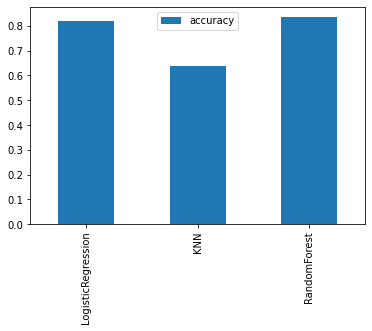

In [69]:
model_comparison = pd.DataFrame(model_results, index=['accuracy'])
#model_comparison.plot.bar() ##  looks kinda not nice

model_comparison.T.plot.bar() ## we transpose it to make it cleaner

In [100]:
## Lets do a hyperparameter handtuning for the Kneighbors classifier to see if it can go any better than the two other models

# setting random seed
np.random.seed(0)
# create empty lists for both
train_scores = []
test_scores = []

# set your Knn model

knn = KNeighborsClassifier()

# set a range for the neighbor
neighbors = range(1, 21)

## loop through the different neighbors using the i in neighbors, i.e. the each value in range 1:21
for i in neighbors:
    knn.set_params(n_neighbors=i)

    ## fit the train split to the knn model
    knn.fit(X_train, y_train)
    
    ## score the train split (you obviously dont need this in normal experiemt) and append to the empty train_score list
    train_scores.append(knn.score(X_train, y_train))
    
    ## score the test split
    test_scores.append(knn.score(X_test, y_test))
    
    
    


In [87]:
print(f' The maximum knn score is: {max(test_scores)* 100:.2f}%')

 The maximum knn score is: 70.49%


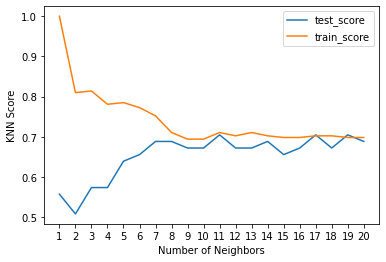

In [102]:
plt.plot(neighbors, test_scores, label='test_score')
plt.plot(neighbors, train_scores, label='train_score')
plt.xlabel('Number of Neighbors')
plt.ylabel('KNN Score')
plt.xticks(np.arange(1,21))
plt.legend()

In [10]:
## lets try to improve the two other better models
## we do a randomizedsearch for our log_reg

### create a grid for the log_reg randomizedsearchcv

log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

## fit the randomizedsearch on the train and test set

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [11]:
## score it
rs_log_reg.score(X_test, y_test)

0.8688524590163934

In [12]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [18]:
## lets try improve the randomforessclassifier model

grid = {'n_estimators': np.arange(100, 1000, 50),
       'max_features': ['auto', 'sqrt'],
       'max_depth': [None, 5, 10, 20],
       'min_samples_split': np.arange(2, 10, 2),
       'min_samples_leaf': np.arange(1, 10, 2)}


## do a randomitedsearch

rs_clf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)

## fit this new model

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=True)

In [19]:
rs_clf.score(X_test, y_test)

0.819672131147541

In [26]:
## try a grid search to see if there would any improvement

grid_gs = {'C': np.logspace(-4, 4, 40),
          'solver': ['liblinear']}


log_reg_grid = GridSearchCV(LogisticRegression(),
                           param_grid=grid_gs,
                           cv=5,
                           verbose=True)

## fit the gridsearchmodel

log_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [27]:
## score it
log_reg_grid.score(X_test, y_test)

0.8688524590163934

In [52]:
## do a roc_cuve and roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve


roc_y_pred = log_reg_grid.predict_proba(X_test)
roc_y_pred_pos = roc_y_pred[:, 1]
roc_y_pred_pos

fpr, tpr, thresholds = roc_curve(y_test, roc_y_pred_pos)
fpr

array([0.        , 0.        , 0.        , 0.03225806, 0.03225806,
       0.06451613, 0.06451613, 0.09677419, 0.09677419, 0.12903226,
       0.12903226, 0.16129032, 0.16129032, 0.38709677, 0.38709677,
       0.41935484, 0.41935484, 1.        ])

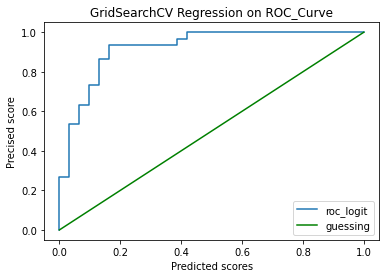

In [51]:
def roc_logit(fpr, tpr):
    plt.plot(fpr, tpr, label='roc_logit')
    plt.plot((0, 1), (0, 1), label='guessing', color='green')
    plt.xlabel('Predicted scores')
    plt.ylabel('Precised score')
    plt.title('GridSearchCV Logit on ROC_Curve')
    plt.legend()
    

roc_logit(fpr, tpr)

C:\Users\Idris Idris\Desktop\heart_disease_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


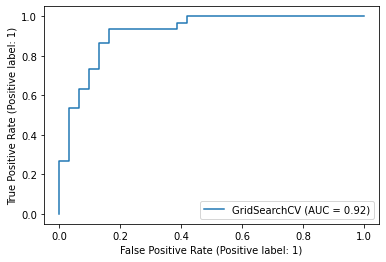

In [53]:
plot_roc_curve(log_reg_grid, X_test, y_test)

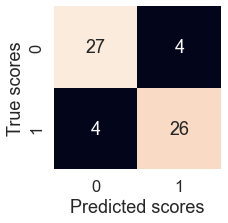

In [62]:

y_pred = log_reg_grid.predict(X_test)
confusion_matrix(y_test, y_pred)

sns.set(font_scale=1.5)
def conf_mat(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,
                    cbar=False)
    plt.xlabel('Predicted scores')
    plt.ylabel('True scores')
    
conf_mat(y_test, y_pred)

In [78]:
## try search for the params in other to instantiate the model for cross_val_score
from sklearn.model_selection import cross_val_score

log_reg_grid.best_params_

## instantiate the new log_reg model

clf = LogisticRegression(C= 0.30702906297578497, 
                        solver='liblinear')

## fit this to the cross_val

cv_accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_accuracy
## get the avg of this
cv_acc_avg = np.mean(cv_accuracy)
cv_acc_avg


## lets do a precision
cv_pre = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_pre
cv_pre_avg = np.mean(cv_pre)
cv_pre_avg

## lets do a recall

cv_rec = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_rec
cv_rec_avg = np.mean(cv_rec)
cv_rec_avg

## lets do f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1
cv_f1_avg = np.mean(cv_f1)
cv_f1_avg


0.867291890754684

<AxesSubplot:title={'center':'Cross_validated Classifications Scores'}>

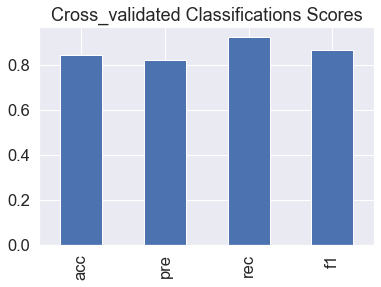

In [90]:
## make a df and compare all these

cross_val_metrics= pd.DataFrame({'acc': cv_acc_avg,
                                 'pre': cv_pre_avg,
                                 'rec': cv_rec_avg,
                                 'f1': cv_f1_avg},
                                 index=[0])

cross_val_metrics.T.plot.bar(title='Cross_validated Classifications Scores',
                            legend=False)